# Analysing Airline Passenger Satisfaction

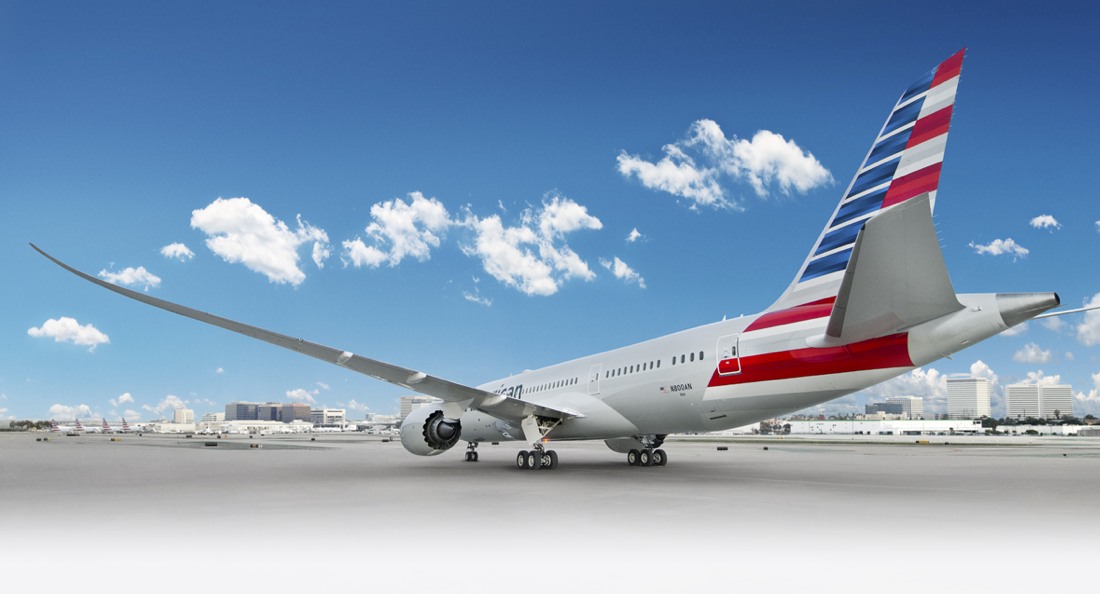



## Business Understanding

One of the greatest inventions of mankind was the airplane, since it turned travels 
significantly faster, more pratical and more comfortable. Nowadays, this kind of transportation is carried out by hundreds of airlines across the world and widely adopted by the costumers, especially in long trips. In order to analyze the satisfation of costumers related to the service provided by the airlines, we intend to answer four questions: 

1. Which class (Business, Echo or Echo Plus) was the most satisfied based on rating? 
2. What is the distribution of marketshare across Classes according to age? 
3. How well can we predict customer's satisfaction (Linear Regression and Decision Tree Classifier)?

## Data Understanding

### Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### Loading and visualizing the Data

In [2]:
df = pd.read_csv('./airline_passenger_satisfaction.csv')
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#drop unnecessary column 'unnamed'
#describe columns stats and their types
df = df.drop(columns = ['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [4]:
#describe some statistical terms based on data
df.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


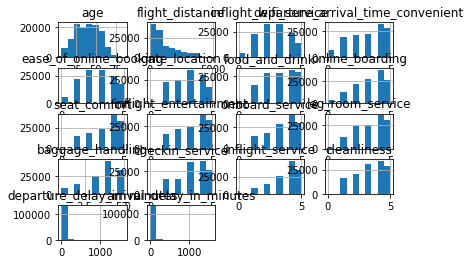

In [5]:
#plot hist to visualize data distribution
df.hist();

In [6]:
#locate columns with missing values
mis_values = df.columns[df.isnull().any()]
mis_values

Index(['arrival_delay_in_minutes'], dtype='object')

In [7]:
# Locate categorical features
cat_feat_columns = df.select_dtypes(include=['object']).columns
cat_feat_columns

Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class',
       'satisfaction'],
      dtype='object')

# Data Preparation

In [8]:
#Since the only column with missing values is 'arrival_delay_in_minutes',
#we can assume that there was no delay, so the value should be zero
df = df.fillna(0.0)

#Now we check again if there is any column with missing values
print(df.isnull().any().sum())

0


In [9]:
#Let's create a function that will handle our categorical features by creating dummy columns

def  create_cat_dummy(df, cat_cols, dummy_na):
    
    for col in cat_cols:
        try:
            #add dummy variable and drop original columns
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
            
    return df

In [10]:
# Create dummy columns and show it
df_new = create_cat_dummy(df, cat_feat_columns, dummy_na = False)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   age                                129880 non-null  int64  
 1   flight_distance                    129880 non-null  int64  
 2   inflight_wifi_service              129880 non-null  int64  
 3   departure_arrival_time_convenient  129880 non-null  int64  
 4   ease_of_online_booking             129880 non-null  int64  
 5   gate_location                      129880 non-null  int64  
 6   food_and_drink                     129880 non-null  int64  
 7   online_boarding                    129880 non-null  int64  
 8   seat_comfort                       129880 non-null  int64  
 9   inflight_entertainment             129880 non-null  int64  
 10  onboard_service                    129880 non-null  int64  
 11  leg_room_service                   1298

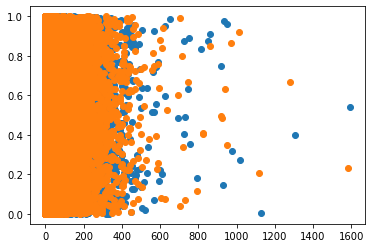

In [11]:
# Remove Outliers: departure_delay_in_minutes and arrival_delay_in_minutes
#We need to remove the outliers in order to avoid discrepance in prediction
plt.scatter (df_new['departure_delay_in_minutes'], np.random.rand(df_new.shape[0]))
plt.scatter (df_new['arrival_delay_in_minutes'], np.random.rand(df_new.shape[0]))

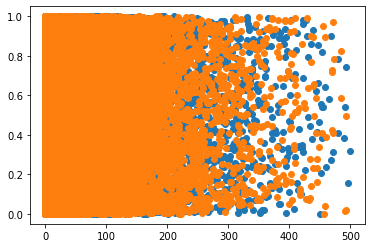

In [12]:
# Based on the Scatter Plot is visible that the majority of values lingers between 0 and 500
# So we will drop the values above it 
df_new = df_new[(df_new['arrival_delay_in_minutes'] <= 500)]
df_new = df_new[(df_new['departure_delay_in_minutes'] <= 500)]
plt.scatter (df_new['departure_delay_in_minutes'], np.random.rand(df_new.shape[0]))
plt.scatter (df_new['arrival_delay_in_minutes'], np.random.rand(df_new.shape[0]))


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

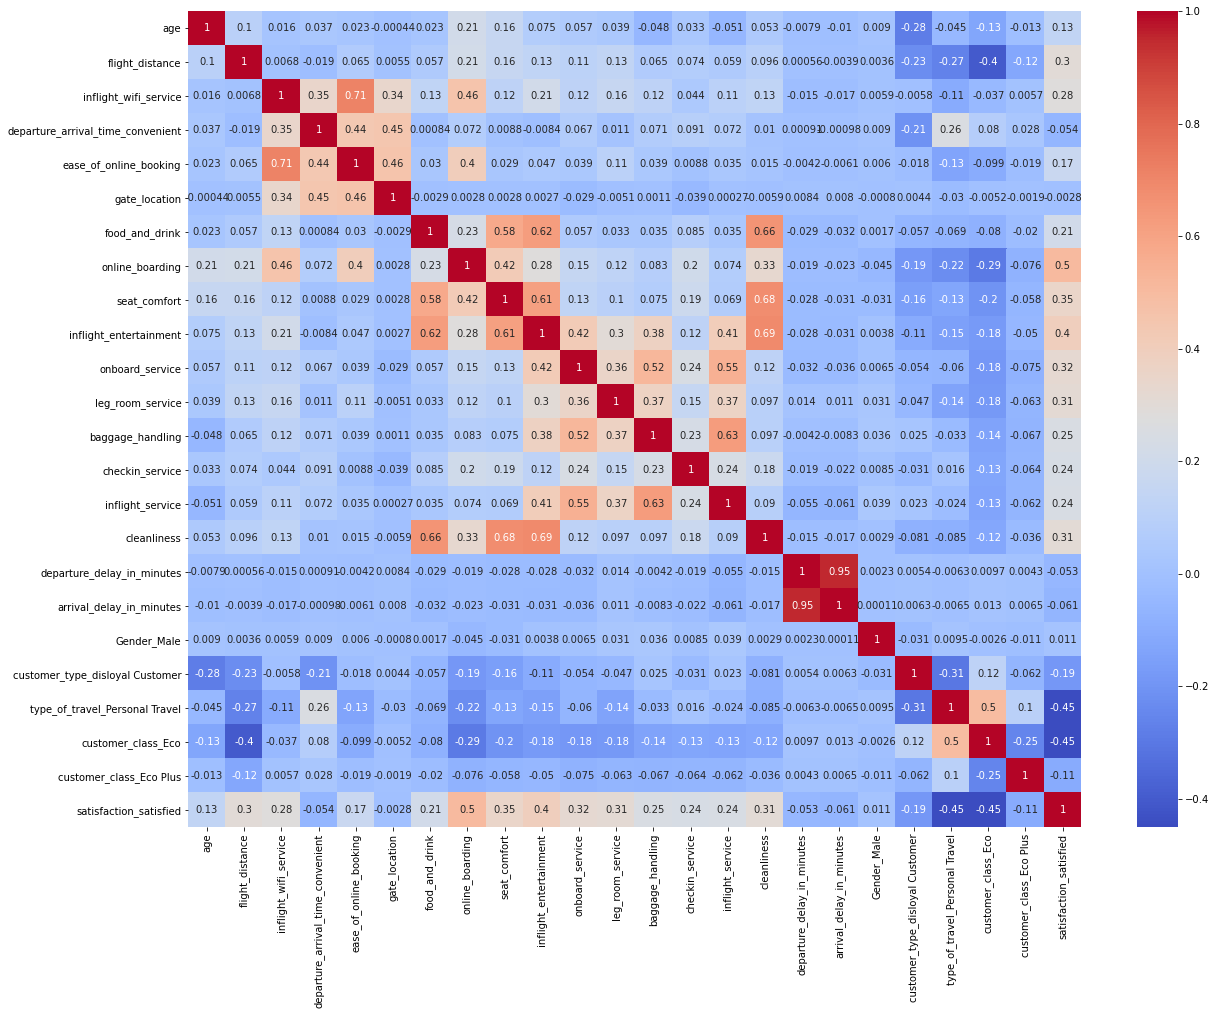

In [13]:
# Print heat map showing correlation between numeric variables
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),annot=True,cmap='coolwarm')
plt.tight_layout

## Data Analysis

### Question 1: Which class (Business, Echo or Echo Plus) was the most satisfied based on rating?

In [14]:
# To answer that we will select the survey rating (columns that describe satisfaction - 2 to 15)
rating_class = df_new.iloc[:, 2:15].groupby(df['customer_class']).mean()
rating_class

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service
customer_class,,,,,,,,,,,,,
Business,2.776040,2.907944,2.915669,2.985210,3.330018,3.719197,3.763873,3.639629,3.682680,3.645970,3.844953,3.521083,3.846514
Eco,2.674004,3.192592,2.603133,2.969737,3.086809,2.814751,3.141862,3.096536,3.119765,3.083652,3.450651,3.124466,3.466709
Eco Plus,2.755978,3.209799,2.662026,2.968328,3.110426,2.885854,3.168349,3.120310,3.036454,3.056223,3.351259,3.014667,3.382825


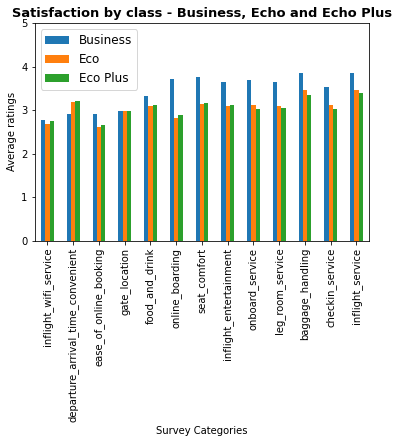

In [15]:
#Plot the mean of the ratings for each class
rating_class_trans = rating_class.transpose()
rating_class_trans.plot( kind = "bar");
plt.title("Satisfaction by class - Business, Echo and Echo Plus", fontsize = 13, weight = 'bold');
plt.xlabel('Survey Categories')
plt.ylabel('Average ratings')
plt.ylim([0.0, 5.0])
plt.legend(loc=2, prop={'size': 12})

Conclusion: Based on the plot above, we can conclude that the business class was significantly the most satisfied class, except for the feature "departure arrival time convenient".

### Question 2: What is the distribution of market share across classes according to age? 

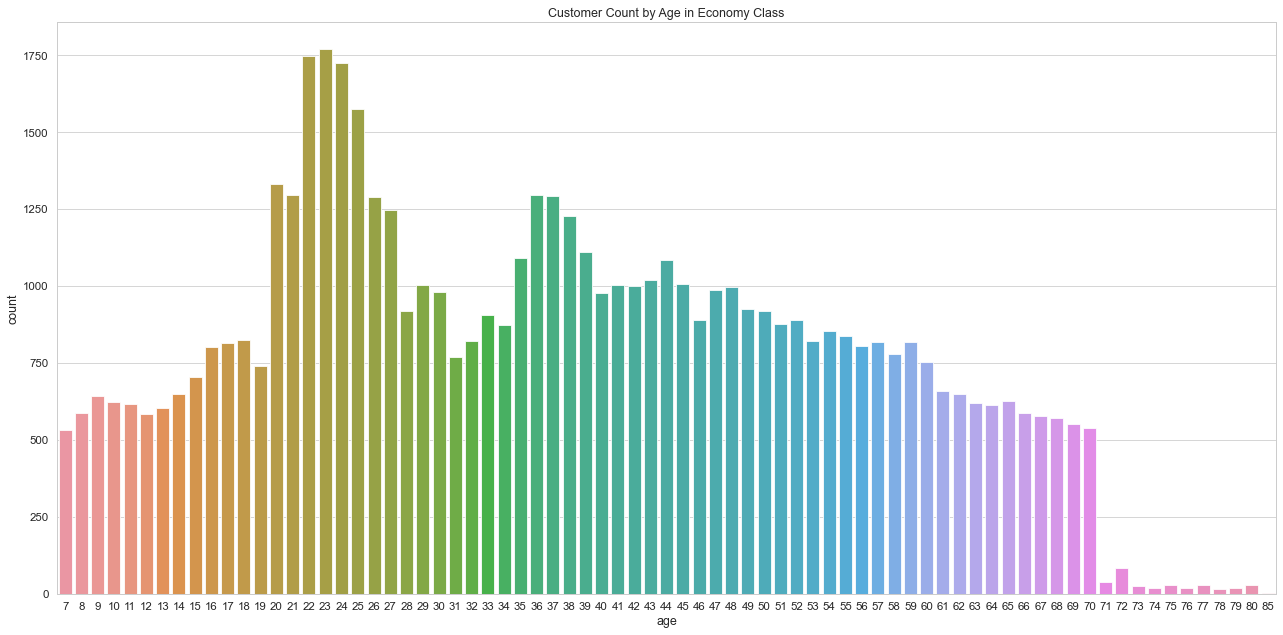

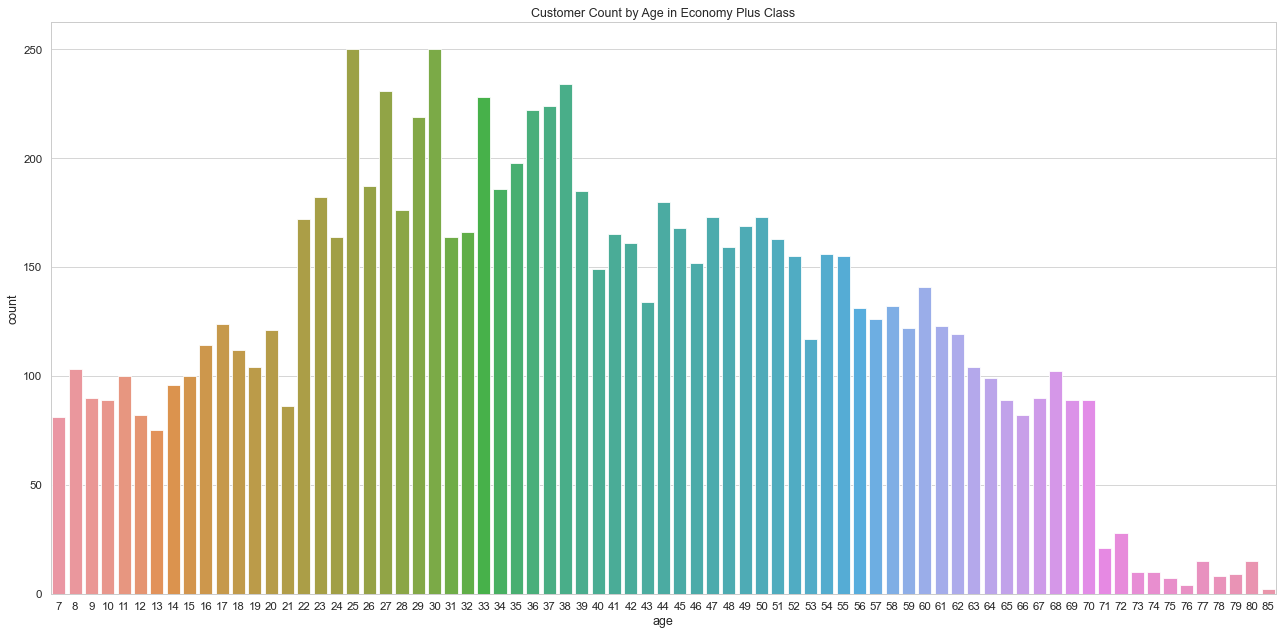

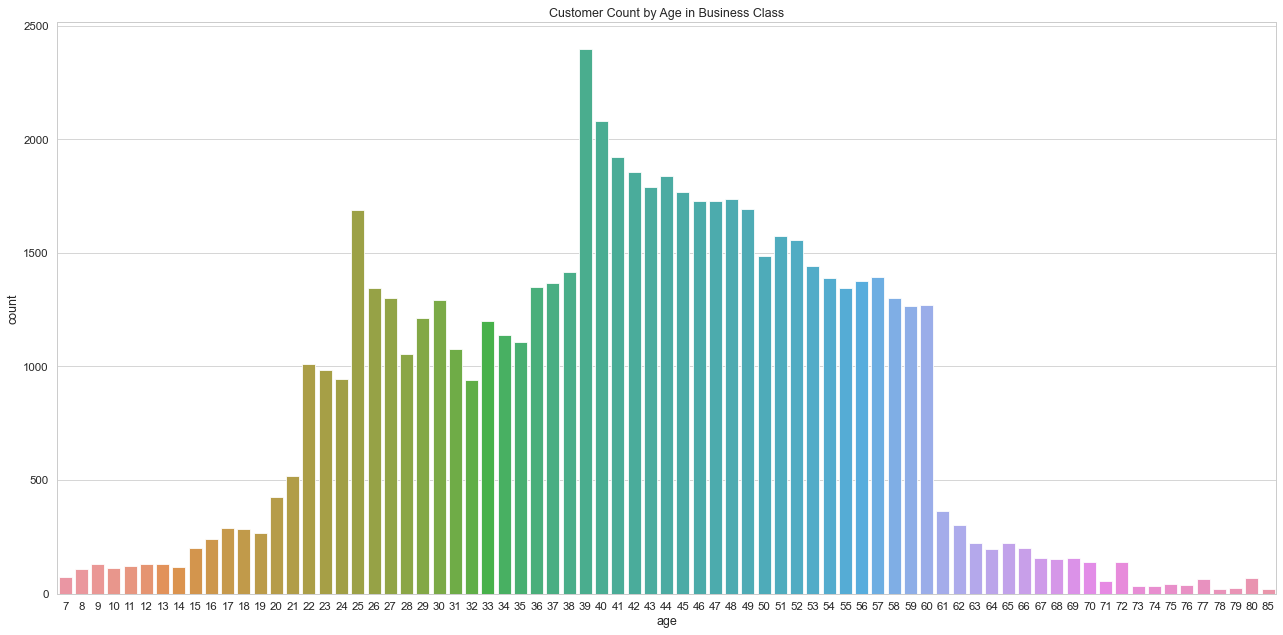

In [16]:
# Grouping count customer for each class
df_eco = df[df['customer_class']=='Eco']
df_eco1 = df[df['customer_class']=='Eco Plus']
df_bus = df[df['customer_class']=='Business']

# Show distribution graph each class by age (customer)
## show the economy class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco,x='age')
ax.set_title('Customer Count by Age in Economy Class')
plt.tight_layout()
plt.show()

## show the economy plus class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_eco1,x='age')
ax.set_title('Customer Count by Age in Economy Plus Class')
plt.tight_layout()
plt.show()

## show the business class
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=df_bus,x='age')
ax.set_title('Customer Count by Age in Business Class')
plt.tight_layout()
plt.show()

Conclusion: it is possible to visualize that the market share across customer class is well defined by young people atteding economy class, middle aged people attending eco plus and older people attending business class. 

### Question 3: How well can we predict customer's satisfaction?

#### Linear Regression 

In [17]:
# First, let's use the Linear Regression Model and see how accurate it is

#Split into explanatory and response variables
X = df_new.drop(['satisfaction_satisfied'], axis=1)
y = df_new['satisfaction_satisfied']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)

"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.556772194343748 on 38951 values.'

Conclusion: Based on the r-squared score (0.556), we can conclude that, according to the Linear Regression Model, approximately half of the observed variation can be explained by the independent variables. 

#### Decision Tree Classifier

In [18]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=None)
dct.fit(X_train,y_train)
dct_training_score = 100*dct.score(X_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100*dct.score(X_test, y_test)
print("Decision Tree accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_training_score, dct_test_score))

Tree Depth: 36
Tree Leaves: 3643
Decision Tree accuracy. Train : 100.00%, Test: 94.42%. 


In [19]:
# Now let's evaluate which tree features are most important on predicting Satisfacition 
features = df_new.columns
importances = dct.feature_importances_
leading_indices = (-importances).argsort()[:23]
print ("Leading features sorted by importance:")
for i in range (23):
    print (i+1, features[leading_indices[i]], round(100*importances[leading_indices[i]],2), '%')

Leading features sorted by importance:
1 online_boarding 36.51 %
2 inflight_wifi_service 17.54 %
3 type_of_travel_Personal Travel 15.28 %
4 inflight_entertainment 4.23 %
5 customer_type_disloyal Customer 2.95 %
6 flight_distance 2.91 %
7 checkin_service 2.91 %
8 age 2.28 %
9 leg_room_service 2.13 %
10 baggage_handling 1.78 %
11 seat_comfort 1.73 %
12 gate_location 1.58 %
13 inflight_service 1.41 %
14 customer_class_Eco 1.26 %
15 cleanliness 1.16 %
16 arrival_delay_in_minutes 0.92 %
17 onboard_service 0.91 %
18 departure_delay_in_minutes 0.81 %
19 food_and_drink 0.49 %
20 departure_arrival_time_convenient 0.48 %
21 ease_of_online_booking 0.37 %
22 Gender_Male 0.24 %
23 customer_class_Eco Plus 0.16 %


Conclusion: The decision tree classifier model is much more accurate than the Linear Regression Model since it was able to predict correctly the test set 94.43% of the time. The tree has depth 36 and 3643 leaves. The most important leading feature in predicting was "online_boarding". 

## Final Conclusions

According to our questions, we could conclude that the least satisfied customers were those in economy class and the most satisfied ones were those in business class. So, in order to increase the overall satisfaction, the airlines should focus their effort in improving the experience of the economy. 


Furthermore, it was possible to realize the correlation between age and class, since the young people tend to choose economy class (for economic reasons), the middle aged people tend to choose eco plus class and the older people tend to choose business class. From that, associated with previous conclusions, we can advise strategic marketing actions focused on young people, who travel economy. 


Finally, we tested two ML algorithms in order to determine how well we can predict customer's satisfaction. The most accurate one was the Decision Tree Classifier, matching 94.43% of the test set. By observing the three leading features sorted by importance, the huge impact on satisfaction came from online boarding, inflight wifi service and type of travel(Personal Travel). 